In [12]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


# Packages

In [13]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
import sys
sys.path.append('/home/divar/projects/geometric-sampling')
import geometric_sampling

In [17]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



# R Different Populations

In [20]:
%%R
install.packages("sampling")
library(sampling)

* installing *source* package ‘sampling’ ...
** package ‘sampling’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0’
installing to /home/divar/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-sampling/00new/sampling/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c str.c -o str.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -flto=auto -ffat-lto-objects -Wl,-z,relro -o sampling.so init.o str.o -L/usr/lib/R/lib -lR


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sampling)


Installing package into ‘/home/divar/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/sampling_2.10.tar.gz'
Content type 'application/x-gzip' length 574173 bytes (560 KB)
downloaded 560 KB


The downloaded source packages are in
	‘/tmp/RtmpGCdy5x/downloaded_packages’


In [19]:
ro.r('library(sampling)')
ro.r('n_percent = .05')


sampling = importr('sampling')
ro.r('library(sampling)')


ro.r('x1 = swiss$Education')
ro.r('y1 = swiss$Examination')




#ro.r('rand_seed = sample(length(x1))')
#ro.r('x1 = x1[rand_seed]')
#ro.r('y1 = y1[rand_seed]')

x1 = np.array(ro.r('x1'))
y1 = np.array(ro.r('y1'))

ro.r('N1 = length(x1)')
N1 = ro.r('N1')
ro.r('n1 = round(n_percent * N1)')
n1 = ro.r('n1')
ro.r('inclusions1 = inclusionprobabilities(x1, n1)')

inclusions1 = ro.r("inclusions1")

inclusions1[inclusions1 == 0] = 1e-4
print(np.corrcoef(x1, y1)[0,1])





# SWISS
#https://search.r-project.org/CRAN/refmans/sampling/html/swissmunicipalities.html
ro.r('data(swissmunicipalities)')
ro.r('y2 = swissmunicipalities$Airbat')
ro.r('x2 = swissmunicipalities$Pop020')
ro.r('v2 = swissmunicipalities$Airind')
ro.r('h2 = swissmunicipalities$H00P01')
ro.r('w2 = swissmunicipalities$H00P04')


x2 = np.array(ro.r('x2'))
y2 = np.array(ro.r('y2'))
v2 = np.array(ro.r('v2'))
w2 = np.array(ro.r('w2'))
h2 = np.array(ro.r('h2'))

ro.r('N2 = length(x2)')
N2 = ro.r('N2')
ro.r('n2 = round(n_percent * N2)')
n2 = ro.r('n2')
ro.r('inclusions2 = inclusionprobabilities(x2, n2)')
inclusions2 = ro.r("inclusions2")

inclusions2[inclusions2 == 0] = 1e-4
print(np.corrcoef(x2, y2)[0,1])






#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')


x3 = np.array(ro.r('x3'))
y3 = np.array(ro.r('y3'))
v3 = np.array(ro.r('v3'))
w3 = np.array(ro.r('w3'))
h3 = np.array(ro.r('h3'))

ro.r('N3 = length(x3)')
N3 = ro.r('N3')
ro.r('n3 = round(n_percent * N3)')
n3 = ro.r('n3')
#ro.r('inclusions3 = inclusionprobabilities(x3 + runif(N3, -1,1), n3)')
ro.r('inclusions3 = inclusionprobabilities(x3, n3)')

inclusions3 = ro.r("inclusions3")
inclusions3[inclusions3 == 0] = 1e-4
ro.r('print(cor(x3,y3))')






#simu
ro.r('x4 = rnorm(100, 200, 5)')
ro.r('y4 = x4 + runif(100, -5, 5)')
ro.r('z4 = x4 + runif(100, -5, 5)')

ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x4))')
ro.r('x4 = x4[rand_seed]')
ro.r('y4 = y4[rand_seed]')
ro.r('z4 = z4[rand_seed]')

x4 = np.array(ro.r('x4'))
y4 = np.array(ro.r('y4'))
z4 = np.array(ro.r('z4'))

ro.r('N4 = length(x4)')
N4 = ro.r('N4')
ro.r('n4 = round(n_percent * N4)')
n4 = ro.r('n4')
ro.r('inclusions4 = inclusionprobabilities(x4, n4)')
inclusions4 = ro.r("inclusions4")
inclusions4[inclusions4 == 0] = 1e-4





#MU284 Sweden
ro.r('data(MU284)')
ro.r('y5 = MU284$RMT85')
ro.r('x5 = MU284$P85')
ro.r('g5 = MU284$P75')
ro.r('v5 = MU284$S82')
ro.r('h5 = MU284$ME84')
ro.r('w5 = MU284$REV84')



y5 = np.array(ro.r('y5'))
x5 = np.array(ro.r('x5'))
g5 = np.array(ro.r('g5'))
v5 = np.array(ro.r('v5'))
h5 = np.array(ro.r('h5'))
w5 = np.array(ro.r('w5'))


ro.r('N5 = length(x5)')
N5 = ro.r('N5')
ro.r('n5 = round(n_percent * N5)')
n5 = ro.r('n5')
ro.r('inclusions5 = inclusionprobabilities(x5, n5)')
inclusions5 = ro.r("inclusions5")
inclusions5[inclusions5 == 0] = 1e-4



#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')



#small simu
ro.r('x6 = c(1,2,3,4,5,6,7,8,9,10)')
ro.r('y6 = c(10,27,30,4,57,60,70,83,80,130)')

x6 = np.array(ro.r('x6'))
y6 = np.array(ro.r('y6'))

ro.r('N6 = length(x6)')
N6 = ro.r('N6')
ro.r('n6 = 3')
n6 = ro.r('n6')
ro.r('inclusions6 = inclusionprobabilities(x6, n6)')
inclusions6 = ro.r("inclusions6")
inclusions6[inclusions6 == 0] = 1e-4



R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :  
R callback write-console: 
   
R callback write-console:  library ‘/usr/local/lib/R/site-library’ contains no packages
  


0.6984152962884828
0.9421664139113467
[1] 0.9750693


In [ ]:
%%R
swiss_big = 0
swiss_small = 0
if (swiss_big == 1){
# Swiss
data(swissmunicipalities)
y2 = swissmunicipalities$Airbat
x2 = swissmunicipalities$Pop020
v2 = swissmunicipalities$Airind
h2 = swissmunicipalities$H00P01
w2 = swissmunicipalities$H00P04
N = length(y2)
n_percent = .05
n = round(n_percent * N)
n = 10


#1 Great
y <- y2; z <- x2; p <- h2

}


if (swiss_small == 1){
# Swiss
print(cor(swiss))
x1 = -swiss$Education
y1 = -swiss$Examination
h1 = swiss$Agriculture
N = length(y1)
n_percent = .05
n = round(n_percent * N)
n = 5


#1 Great
y <- y1; z <- x1; p <- h1

}


# Simu The best

## R Popu

[1] 0.7110757
[1] 0.8136454
[1] 0.9205719
[1] 0.7254931
[1] 0.8346199
[1] 0.9288661
[1] 0.2793896


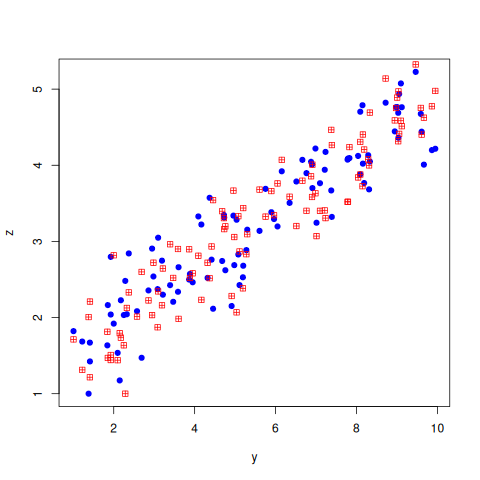

In [21]:
%%R

library(sampling)

set.seed(123)
N <- 100

# Generate a positive y
y <- runif(N, 1, 10) # all positive

# Function to generate variable with specified correlation to y
make_correlated_pos <- function(y, rho) {
  x <- rnorm(N)
  z <- rho * scale(y) + sqrt(1 - rho^2) * scale(x)
  # Rescale to positive
  zmin <- min(z)
  z_pos <- as.numeric(z - zmin + 1)
  return(z_pos)
}

# Three z's with desired correlations
z1 <- make_correlated_pos(y, 0.72)
z2 <- make_correlated_pos(y, 0.82)
z3 <- make_correlated_pos(y, .92)

# Three p's with desired correlations
p1 <- make_correlated_pos(y, 0.72)
p2 <- make_correlated_pos(y, 0.82)
p3 <- make_correlated_pos(y, 0.92)
p0 = rep(1, N)

# Check correlations
print(cor(y, z1))
print(cor(y, z2))
print(cor(y, z3))
print(cor(y, p1))
print(cor(y, p2))
print(cor(y, p3))

# Now you have y, z1, z2, z3, p1, p2, p3
# To access a scenario, e.g., scenario 1: y, z1, p1
scenario1 <- data.frame(y, z=z1, p=p1)
# scenario 2: y, z1, p2
scenario2 <- data.frame(y, z=z1, p=p2)
# ...and so on for all 9 combinations
z = z3
p = p3
# Example of one scenario output
# y = (y - mean(y))/ sd(y)
# z = (z - mean(z))/ sd(z)

# y = y/ sd(y)
# z = z/ sd(z)
n = 5
N = length(y)
pik = inclusionprobabilities(p, n)

#print(cbind(p,pik))
plot(y, z, col='blue', pch=19, xlab='y', ylab='z')
points(y, p, col='red', pch=12, xlab='y', ylab='z')
points(z/pik, y/pik, col='green', pch = 2)
print(cor(z/pik, y/pik))

cor(y, z_origin):  0.8191052 
cor(y, z_lin):  0.8191052 
cor(y, p):  0.8962079 


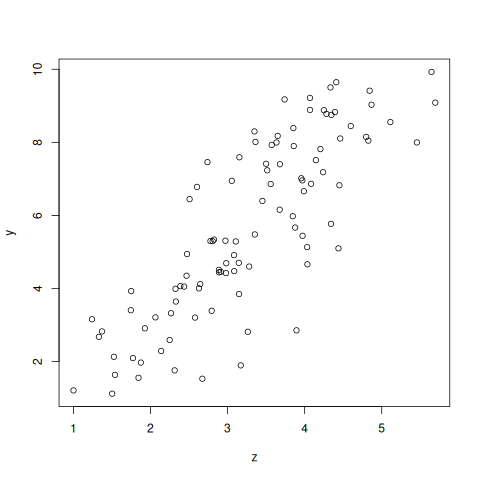

In [22]:
%%R
set.seed(1)
N <- 100
n = 10
y <- runif(N, 1, 10)      # or whatever y you want
rho_z <- 0.8
rho_p <- 0.9
intercept <- 5          
origin = 1


# ---- 1. Correlated z, regression through origin ----
x <- rnorm(N)
z_origin <- as.numeric(scale(y)) * rho_z + as.numeric(scale(x)) * sqrt(1 - rho_z^2)
ifelse(origin == 1,
z <- as.numeric(z_origin - min(z_origin) + 1)   # make positive (if you want)
,z <- z_origin + intercept)
z_origine <- as.numeric(z_origin - min(z_origin) + 1)
z_lin <- z_origin + intercept
# ---- 3. Correlated p ----
p <- as.numeric(scale(y)) * rho_p + as.numeric(scale(rnorm(N))) * sqrt(1 - rho_p^2)
p <- as.numeric(p - min(p) + 1)   # make positive
pik = inclusionprobabilities(p, n)
# ---- Ready to use variables ----
cat("cor(y, z_origin): ", cor(y, z_origin), "\n")
cat("cor(y, z_lin): ", cor(y, z_lin), "\n")
cat("cor(y, p): ", cor(y, p), "\n")
plot(z, y)

In [23]:
%%R

print(cor(z, y))
print(cor(z/pik, y/pik))

pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_z = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_z = min(var_z[var_z>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])



[1] 0.8191052
[1] 0.3305412


In [24]:
%%R
Ppi <- function(Pi) {
  
  N <- length(Pi)
  #SOME ERROR MESSAGES
  if (N < 2) {
    rlang::abort("The sampling designs should be define on a set of more than one element. (length(Pi) > 1)")
  }
  
  for (k in 1:N) {
    if (Pi[k] >= 1 | Pi[k] <= 0) {
      rlang::abort("Pi is not a vector of probabilities (0 <= p < 1)")
    }
  }
  
  if (as.integer(round( sum(Pi) , 9)) - round( sum(Pi) , 9) != 0) {
    rlang::abort("The sum of the first order inclusion probabilities should be an integer")
  }
  
  
  s <- c()
  c <- c()
  kr <- c()
  alpha <-c()
  sum <-0
  r<-1
  r_prev<-0
  n_<-sum(Pi)
  
  for (k in 1:N) {
    prev_sum<-sum
    sum<-sum+Pi[k]
    if (sum>=r)
    {
      kr[r] <- k
      alpha[k] <-r-prev_sum
      
      int <- sqrt( (1 - Pi[k]) / (1 - alpha[k]) )
      s[k] <- round(int, 8)
      r_prev<-r
      r<-r+1
    }
    
    else {
      inter <- sqrt( Pi[k] / (r_prev + 1 - prev_sum) )
      s[k] <- round(inter, digits = 15)
    }
    
    c[k] <- sqrt(1 - s[k]^2)
    
  }
  
  # ce point n'est pas joli, mais je n'ai pas trouvé l'erreur. A retravailler..
  #print(kr)
  if(max(kr)!=length(Pi)){
    kr<-cbind(kr,length(Pi))
    r<-r+1
    r_prev<-r_prev+1}
  #print(kr)
  V <- matrix(0, nrow = N , ncol = r_prev)
  V[1, 1] = 1
  if ((r_prev-1) != 0) {
    for (r in 1:(r_prev-1)) {
      V[kr[r] + 1, r + 1] = 1
    }
  }
  
  for (k in 1:(N-1)) {
    L <- V[k, ]
    M <- V[k + 1,]
    V[k, ] <- s[k] * L - c[k] * M
    V[k + 1, ] <- c[k] * L + s[k] * M
  }
  return(V)
}




Drawing_Dsd <- function(v, s = 1, B = FALSE, seed = NULL){
  
  
  if (is.numeric(v)) {
    return(.dsd_sampling_mult(v, s, B, seed))
  }
  else{ return(.dsd_sampling_mult_complex(v, s, B, seed))}
}


.dsd_sampling_mult_complex <- function(v, s, B, seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C_complex(v, B, seed))
  }
  
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C_complex(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}


.dsd_sampling_mult <- function(v = NULL, s, B,seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C(v, B, seed))
  }
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}

.dsd_sampling_01_B_C_complex <- function(v, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #Step 1: Sampling the first element
  w <- v
  
  total <- 0
  i <- 0
  pi1 <- Re( diag( v %*% t(Conj(v)) ) )
  
  if (length(pi1[pi1 < 0]) != 0 | length(pi1[pi1 >= 1]) != 0) {
    rlang::abort("The matrix v given as input doesn't suit to the input expected (See the functions pgd and periodic_dsd)")
  }
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  M <- v[i,]
  e1 <- M / c(Re (sqrt (t(M) %*% Conj(M)) ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- v %*% Conj(e1)
    pi1 <- pi1 - t(inter * Conj(inter))
    pi2 <- Re( 1 / r*pi1 )
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    w <- w - t( t(Conj(e1)) %*% t(w) ) %*% t(e1)
    L <- w[i, ]
    e1 <- L / c(Re(sqrt (t(L) %*% Conj(L) )))
    
  }
  
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}
.dsd_sampling_01_B_C <- function(v = NULL, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #First step: Sampling the first element
  w <- v
  
  
  total <- 0
  i <- 0
  pi1 <- diag(v  %*% t(v))
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  
  l <- v[i,]
  e1 <- l / as.numeric( sqrt( t(l) %*% l ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- (v %*% e1)
    pi1 <- pi1 - t( inter * inter )
    pi2 <- 1 / r * pi1
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    
    w <- w - (w %*% e1) %*% t(e1)
    L <- w[i,]
    e1 <- L / as.numeric( sqrt( t(L) %*% L ))
    
  }
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}

In [25]:
%%R
library(sampling)



#pik <- inclusionprobabilities(p, n)

sort_index <- order(z / pik, decreasing = TRUE)
# sort_index <- order(y / pik, decreasing = TRUE)
# sort_index <- order(y, decreasing = TRUE)

y <- y[sort_index]; z <- z[sort_index]; pik <- pik[sort_index]; p = p[sort_index]
ones = rep(1, N)
print(cor(y, z))
print(cor(y, p))
N <- length(y)


Base <- Ppi(pik)
Ppi_mat <- Base %*% t(Base)

# Variance matrix formula
Dpi_inv <- diag(1 / pik)
I_N <- diag(N)
A <- (I_N - Ppi_mat) * Ppi_mat
var_ht_z <- as.numeric(t(z) %*% Dpi_inv %*% A %*% Dpi_inv %*% z)
cat("Variance of HT estimator via DSD formula_z: ", var_ht_z, "\n")

var_ht <- as.numeric(t(y) %*% Dpi_inv %*% A %*% Dpi_inv %*% y)
cat("Variance of HT estimator via DSD formula: ", var_ht, "\n")


# Monte Carlo
# Number of repetitions
m <- 2000
ht_estimates_dsd_y <- numeric(m)
ht_estimates_dsd_z <- numeric(m)
ht_estimates_cube_y <- numeric(m)
ht_estimates_cube_z <- numeric(m)

for (i in 1:m) {
  # --- Determinantal Sampling ---
  samp <- Drawing_Dsd(Base, s = n, B = TRUE)
  sel_idx <- which(samp[, 1] == 1)  # Adjust if needed
  ht_estimates_dsd_y[i] <- sum(y[sel_idx] / pik[sel_idx])
  ht_estimates_dsd_z[i] <- sum(z[sel_idx] / pik[sel_idx])
  
  # --- Cube Method Sampling ---
  # If you want to balance on z, make sure to use cube method with z in the auxiliary matrix
  cube_sample <- samplecube(cbind(pik, ones, z), pik, comment = FALSE)
  sel_cube <- which(cube_sample == 1)
  ht_estimates_cube_y[i] <- sum(y[sel_cube] / pik[sel_cube])
  ht_estimates_cube_z[i] <- sum(z[sel_cube] / pik[sel_cube])
}
var_y_0 = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')

var_z_0 = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z_0) = c('sysz', 'maxz', 'midz', 'tilz', 'srsz')

threshold_z = min(var_z_0)
threshold_y = min(var_y_0)

# --- Variance and Mean calculations ---
var_dsd_y   <- var(ht_estimates_dsd_y)
var_cube_y  <- var(ht_estimates_cube_y)
var_dsd_z   <- var(ht_estimates_dsd_z)
var_cube_z  <- var(ht_estimates_cube_z)
mean_dsd_y  <- mean(ht_estimates_dsd_y)
mean_cube_y <- mean(ht_estimates_cube_y)
mean_dsd_z  <- mean(ht_estimates_dsd_z)
mean_cube_z <- mean(ht_estimates_cube_z)

cat("Here is the Vincent Efficiency y:\n")
eff_dsd_y <- min(var_y_0[var_y_0>0]) / var_ht
eff_dsd_z <- min(var_z_0[var_z_0>0]) / var_ht_z
cat(sprintf("  DSD_y:  %.5f\n  DSD_z: %.5f\n", eff_dsd_y, eff_dsd_z))


cat("Monte Carlo variance of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_y, var_cube_y))

eff_dsd_y <- min(var_y_0) / var_dsd_y
eff_cube_y <- min(var_y_0) / var_cube_y

cat("Monte Carlo efficiency of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_y, eff_cube_y))

cat("Monte Carlo mean of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_y, mean_cube_y))
cat(sprintf("  Actual total of y: %.5f\n", sum(y)))

cat("\nMonte Carlo variance of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_z, var_cube_z))

eff_dsd_z <- min(var_z_0) / var_dsd_z
eff_cube_z <- min(var_z_0) / var_cube_z

cat("Monte Carlo efficiency of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_z, eff_cube_z))

cat("Monte Carlo mean of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_z, mean_cube_z))
cat(sprintf("  Actual total of z: %.5f\n", sum(z)))

results = round(c(var__srs/min(var_z_0[-5]), var__srs/var_cube_z, var__srs/var_ht_z,  var__srs_y/min(var_y_0[-5]), var__srs_y/var_cube_y,var__srs_y/var_ht ),2)
names(results) = c('eff_GFS_0_z','eff_cube_z', 'eff_dsd_z', 'eff_GFS_0_y' , 'eff_cube_y','eff_dsd_y')
print(results)

[1] 0.8191052
[1] 0.8962079
Variance of HT estimator via DSD formula_z:  41.63193 
Variance of HT estimator via DSD formula:  1199.64 
Here is the Vincent Efficiency y:
  DSD_y:  0.66607
  DSD_z: 8.17832
Monte Carlo variance of HT estimator for y:
  DSD:  1255.89918
  Cube: 998.14322
Monte Carlo efficiency of HT estimator for y:
  DSD:  0.63623
  Cube: 0.80053
Monte Carlo mean of HT estimator for y:
  DSD:  564.88708
  Cube: 566.92423
  Actual total of y: 566.06236

Monte Carlo variance of HT estimator for z:
  DSD:  40.20867
  Cube: 89.07822
Monte Carlo efficiency of HT estimator for z:
  DSD:  8.46780
  Cube: 3.82225
Monte Carlo mean of HT estimator for z:
  DSD:  328.46978
  Cube: 328.32042
  Actual total of z: 328.20673
eff_GFS_0_z  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       2.87       10.97       23.46        6.53        5.23        4.35 


In [26]:
%%R
results = round(c(var__srs/min(var_z_0[-5]), var__srs/var_cube_z, var__srs/var_ht_z,  var__srs_y/min(var_y_0[-5]), var__srs_y/var_cube_y,var__srs_y/var_ht ),2)
names(results) = c('eff_GFS_0_z','eff_cube_z', 'eff_dsd_z', 'eff_GFS_0_y' , 'eff_cube_y','eff_dsd_y')
print(results)

eff_GFS_0_z  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       2.87       10.97       23.46        6.53        5.23        4.35 


In [27]:
%%R

z_hat = z / pik
y_hat = y / pik
pikl_sys = UPsystematicpi2(pik)

var__sys_z_test <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__sys_y_test <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
print(var__srs/var__sys_z_test)
print(var__srs_y/var__sys_y_test)

print(var_ht_z / var__sys_z_test)
print(var_ht / var__sys_y_test)

         [,1]
[1,] 5.817429
         [,1]
[1,] 4.340279
          [,1]
[1,] 0.2479381
          [,1]
[1,] 0.9975124


## Astar

/tmp/ipykernel_22469/2769522020.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  swap_units             = int(N/10)


cor(y, z) 0.8191052011925352
cor(y, inclusions) 0.8962078633647944
2000 10 200000 0.9 0.9


Generating initial designs:   0%|             | 7/10000 [00:00<02:32, 65.57it/s]

Initial design 0: method = Original, efficiency z = 0.2479, y=0.9975
New best at idx=0: method = Original, efficiency z = 0.2479 and efficiency y = 0.9975
New best at idx=2: method = z/pi, efficiency z = 0.2479 and efficiency y = 0.9975
New best at idx=3: method = swap, efficiency z = 0.2517 and efficiency y = 0.9998
New best at idx=5: method = swap, efficiency z = 0.2619 and efficiency y = 1.1337
New best at idx=6: method = swap, efficiency z = 0.2658 and efficiency y = 0.9225
New best at idx=7: method = swap, efficiency z = 0.2702 and efficiency y = 1.1052


Generating initial designs:   0%|           | 22/10000 [00:00<01:27, 113.70it/s]

New best at idx=22: method = swap, efficiency z = 0.2760 and efficiency y = 0.5632


Generating initial designs:   1%|           | 63/10000 [00:00<00:56, 175.15it/s]

New best at idx=43: method = swap, efficiency z = 0.2875 and efficiency y = 1.6891


Generating initial designs:   2%|▏         | 175/10000 [00:01<00:52, 186.03it/s]

New best at idx=162: method = swap, efficiency z = 0.2911 and efficiency y = 0.7811


Generating initial designs:   2%|▏         | 239/10000 [00:01<00:55, 174.91it/s]

New best at idx=205: method = swap, efficiency z = 0.2925 and efficiency y = 0.8169


Generating initial designs:   8%|▊         | 779/10000 [00:03<00:36, 249.60it/s]

New best at idx=723: method = swap, efficiency z = 0.2935 and efficiency y = 1.2516


Generating initial designs:  19%|█▋       | 1856/10000 [00:08<00:43, 186.51it/s]

New best at idx=1829: method = swap, efficiency z = 0.3014 and efficiency y = 0.7098


Generating initial designs:  47%|████▏    | 4722/10000 [00:22<00:26, 198.88it/s]

New best at idx=4649: method = swap, efficiency z = 0.3060 and efficiency y = 0.6016


Generating initial designs:  50%|████▍    | 4969/10000 [00:23<00:19, 261.32it/s]

New best at idx=4892: method = swap, efficiency z = 0.3118 and efficiency y = 0.9995


Generating initial designs: 100%|████████| 10000/10000 [00:44<00:00, 223.58it/s]



Progress: 0.0% 
=== Best Solution Updated at Iteration 0 ===
  Balancing Method:    origine
  Best Cost (z):       135.226
  Best Cost (y):       1598.584
  rho (z, y):          0.819
  rho (z_hat, y_hat):  0.331
  rho (p, y):          0.896
  Criteria Value:      160.732
  Efficiency z (0→f):  0.248 → 0.301 → 0.3079
  Efficiency y (0→f):  0.998 → 0.71 → 0.7504
  Efficiency z (srs):  5.759 → 0.301 → 7.1514
  Efficiency y (srs):  4.297 → 0.71 → 3.2326
  Alpha:               0.9
  Num changes:         1
  Design Depth:        1
  Design Size (|D|):   102
  Open set size:       11


=== Best Solution Updated at Iteration 0 ===
  Balancing Method:    origine
  Best Cost (z):       133.176
  Best Cost (y):       1701.6585
  rho (z, y):          0.819
  rho (z_hat, y_hat):  0.331
  rho (p, y):          0.896
  Criteria Value:      160.373
  Efficiency z (0→f):  0.248 → 0.301 → 0.3126
  Efficiency y (0→f):  0.998 → 0.71 → 0.705
  Efficiency z (srs):  5.759 → 0.301 → 7.2615
  Efficiency y (sr

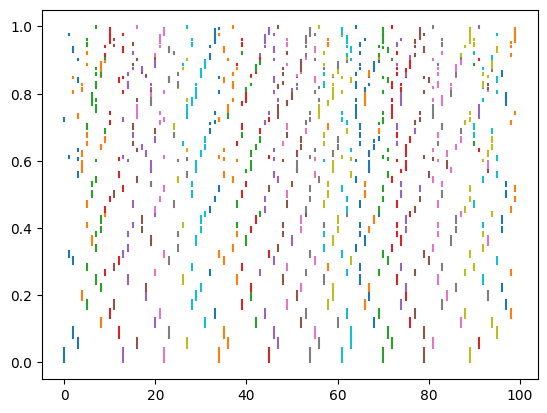

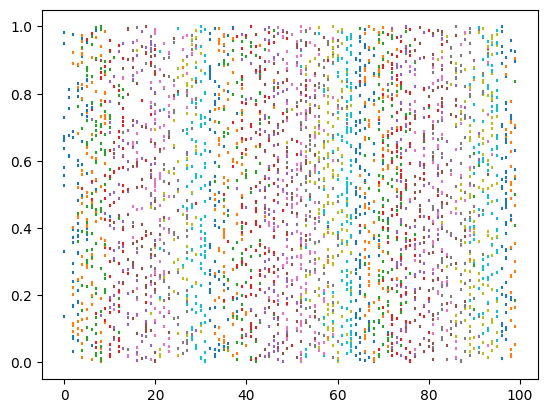

In [28]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])
inclusions = np.array(ro.r['pik'])

print('cor(y, z)', np.corrcoef(y, z)[0, 1])
print('cor(y, inclusions)', np.corrcoef(y, inclusions)[0, 1])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
var_z_0 = np.array(ro.r['var_z_0'])
eff_dsd_z = float(ro.r['eff_dsd_z'][0])
eff_dsd_y = float(ro.r['eff_dsd_y'][0])
inclusions = np.array(ro.r['pik'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_y = ro.r['threshold_y']
threshold_z = float(ro.r['var_ht_z'][0])
threshold_y = float(ro.r['var_ht'][0])

inclusions = np.array(inclusions)

import numpy as np

num_new_nodes          = 10
num_changes_lower      = 1
num_changes_upper      = 1
max_open_set_size      = 200000
switch_lower           = .9
switch_upper           = .9
max_iterations         = 2000
num_initial_nodes      = 10000
initial_design_to_use  = 10
num_top_restart_nodes  = 10
stuck_fraction         = 0.99

swap_iterations        = int(np.round(.7 * num_initial_nodes))  # ensure integer!
swap_distance          = 3
swap_units             = int(N/10)







show_results           = 1
random_restart_period  = 10000   # how often to inject random designs
random_injection_count = 500     # how many random designs to inject
prune_fraction         = .9
var_percent_exected    = (1/eff_dsd_z) * .1  # how much of the variance to expect in the best design



rng = np.random.default_rng()  # Recommended for controlled/stable random runs
print(max_iterations, num_new_nodes, max_open_set_size, switch_lower, switch_upper)

# You must define y, z, inclusions, threshold_z, threshold_y earlier in your notebook or script.

# Criterion must be set up per your class structure.
criterion = VarNHT(main_variable=y, auxiliary_variable=z, inclusion_probability=inclusions, balance_method='linear')

astar = AStar(
    inclusions              = inclusions,
    num_initial_nodes       = num_initial_nodes,
    initial_design_to_use   = initial_design_to_use,
    criteria                = criterion,
    z                       = z,
    y                       = y,
    threshold_z             = threshold_z,
    threshold_y             = threshold_y,
    switch_lower            = switch_lower,
    switch_upper            = switch_upper,
    num_changes_lower       = num_changes_lower,
    num_changes_upper       = num_changes_upper,
    show_results            = show_results,
    var_percent_exected     = var_percent_exected,
    swap_iterations         = swap_iterations,
    swap_distance           = swap_distance,
    swap_units              = swap_units,
    rng                     = rng,                
    # atomize                 = False,                        
    # delta                   = 0.01,                         
)

result = astar.run(
    max_iterations             = max_iterations,
    num_new_nodes              = num_new_nodes,
    max_open_set_size          = max_open_set_size,
    random_restart_period      = random_restart_period,
    random_injection_count     = random_injection_count,
    prune_fraction             = prune_fraction,
    num_top_restart_nodes      = num_top_restart_nodes,
    stuck_fraction             = stuck_fraction,

)

print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
# print(np.round(var_z_0, 1))
# print(np.round(var_y_0, 1))
astar.initial_design.show()
astar.best_design.show()

In [ ]:
import pandas as pd
print("size of init design",len(list(astar.initial_design)))
print("size of best design", len(list(astar.best_design)))
#print(astar.initial_design.criteria_value())
print(astar.criteria(astar.initial_design))
print(astar.criteria(astar.best_design))
print(N)
sum_inclusion_last = 0
sum_inclusion_init = 0
for k in range(int(N)):
    size_last = 0
    prob_last = 0
    len_last = 0
    prob_last_second = 0
    prob = 0
    z_ests = []
    y_ests = []
    probs  = []
    for item in astar.best_design:
        prob += item.probability
        size_last += 1
        len_last += len(item.ids)
        probs.append(item.probability)
        ids = np.array(list(item.ids), dtype=int)
        z_ests.append(np.sum(z[ids]/inclusions[ids]))
        y_ests.append(np.sum(y[ids]/inclusions[ids]))
            
        if k in item.ids:
            
            #print(np.round(np.sum(y[ids]/inclusions[ids])), np.round(np.sum(z[ids]/inclusions[ids])))
            prob_last += item.probability
            if k+1 in item.ids:
                prob_last_second += item.probability
    sum_inclusion_last += prob_last
        #print(item)
    size_ini = 0
    prob_ini = 0
    len_ini = 0
    prob_ini_second = 0
    for item in astar.initial_design:
        len_ini += len(item.ids)
        size_ini += 1
        if k in item.ids:
            #print(item.probability)
            prob_ini += item.probability
            if k+1 in item.ids:
                prob_ini_second += item.probability
    sum_inclusion_init += prob_ini
    
        #print(item)
    #print(np.round(prob_last, 3), np.round(prob_ini, 3), np.round(inclusions[k], 3))
    if  not (len_last%n == 0 and len_ini%n == 0 and 
        np.round(prob_last, 3) == np.round(prob_ini, 3) and 
        np.round(prob_last, 3) == np.round(inclusions[k], 3)):
        print('yessssss')
print('sum of inclusions, last ini and original', sum_inclusion_last, sum_inclusion_init, sum(inclusions))
print(prob)
print('n = ', n)
#print(pd.concat([pd.Series(z_ests), pd.Series(y_ests), pd.Series(probs)], axis=1))
y_ests = np.array(y_ests)
z_ests = np.array(z_ests)
probs = np.array(probs)
print(np.sum(y), np.sum(z), np.sum(y_ests*probs), np.sum(z_ests*probs))
print(np.sum(y), np.sum(z), np.sum(y_ests*probs), np.sum(z_ests*probs))
print('var z estimates', np.round(np.sum(z_ests**2*probs)-np.sum(z_ests*probs)**2, 3))
print('var y estimates', np.round(np.sum(y_ests**2*probs)-np.sum(y_ests*probs)**2, 3))

In [ ]:
print(np.sum(inclusions))

In [ ]:
%%R
x = rnorm(100, 200, 5)
z = (x - mean(x))/ sd(x)
z = (x)/ sd(x)
pik = inclusionprobabilities(runif(100), 10)
n = 10
N = length(x)
est_x = array(0, 100)
est_z = array(0, 100)

est_x_srs = array(0, 100)
est_z_srs = array(0, 100)

for (i in 1:100){
  s = UPmaxentropy(pik)
  est_x[i] = sum(x[s==1]/pik[s==1])
  est_z[i] = sum(z[s==1]/pik[s==1])

  s_srs = srswor(n,N)
  est_x_srs[i] = N * mean(x[s_srs==1])
  est_z_srs[i] = N * mean(z[s_srs==1])

}
print(cbind(est_x, est_z))

print(c(mean(est_x), mean(est_z)))
print(c(var(est_x), var(est_z)))

print(c(mean(est_x_srs), mean(est_z_srs)))
print(c(var(est_x_srs), var(est_z_srs)))

print(c(var(est_x_srs)/var(est_x), var(est_z_srs)/var(est_z)))
print(c(sum(x), sum(z)))